### AIM
Yelp is a business organisation that connects people with great local businesses. On the Yelp website you can find recommendations for restaurants, home services, auto services and many local businesses near you. 

The aim of this project is to find the factors that affect a Yelp rating of a Restaurant, since a restaurant's success is affected by its reputation. The project will make use of Multiple Linear Regression to investigate the factors that affect a restaurant's Yelp rating. 

Finally, I would love to own a restaurant someday in Berlin, Germany so we would use this model to predict the Yelp rating of this restaurant even before it is opened.

### DATA

The data used in this project was collected from the Yelp website. https://www.yelp.com/dataset. The data is provided in six different files:

- `yelp_business.json`: Contains business data including location data, attributes, and categories.
- `yelp_review.json`: Contains full review text data including the user_id that wrote the review and the business_id the review is written for.
- `yelp_user.json`: User data including the user's friend mapping and all the metadata associated with the user
- `yelp_checkin.json`: Checkins on a business.
- `yelp_tip.json`: Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.
- `yelp_photo.json`: Contains photo data including the caption and classification (one of "food", "drink", "menu", "inside" or "outside").


#### Ready, Set, Go....

In [1]:
#importing pandas 
import pandas as pd

In [2]:
#Loading the files into dataframes
businesses = pd.read_json('data/yelp_business.json', lines = True)
reviews = pd.read_json('data/yelp_review.json', lines = True)
users = pd.read_json('data/yelp_user.json', lines = True)
checkins = pd.read_json('data/yelp_checkin.json', lines = True)
tips = pd.read_json('data/yelp_tip.json', lines = True)
photos = pd.read_json('data/yelp_photo.json', lines = True)

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

#### Inspecting the businesses dataframe

In [4]:
#First 3 rows of the business dataframe
businesses.head(3)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0


In [5]:
#Buisness dataframe information
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             188593 non-null  object 
 1   alcohol?            188593 non-null  int64  
 2   attributes          162807 non-null  object 
 3   business_id         188593 non-null  object 
 4   categories          188052 non-null  object 
 5   city                188593 non-null  object 
 6   good_for_kids       188593 non-null  int64  
 7   has_bike_parking    188593 non-null  int64  
 8   has_wifi            188593 non-null  int64  
 9   hours               143791 non-null  object 
 10  is_open             188593 non-null  int64  
 11  latitude            188587 non-null  float64
 12  longitude           188587 non-null  float64
 13  name                188593 non-null  object 
 14  neighborhood        188593 non-null  object 
 15  postal_code         188593 non-nul

#### Inspecting the reviews dataframe

In [6]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   business_id               188593 non-null  object 
 1   average_review_age        188593 non-null  float64
 2   average_review_length     188593 non-null  float64
 3   average_review_sentiment  188593 non-null  float64
 4   number_funny_votes        188593 non-null  int64  
 5   number_cool_votes         188593 non-null  int64  
 6   number_useful_votes       188593 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 10.1+ MB


#### Inspecting the users dataframe

In [8]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 188593 non-null  object 
 1   average_number_friends      188593 non-null  float64
 2   average_days_on_yelp        188593 non-null  float64
 3   average_number_fans         188593 non-null  float64
 4   average_review_count        188593 non-null  float64
 5   average_number_years_elite  188593 non-null  float64
dtypes: float64(5), object(1)
memory usage: 8.6+ MB


#### Inspecting the checkins dataframe

In [10]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [11]:
checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157075 entries, 0 to 157074
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   business_id       157075 non-null  object
 1   time              157075 non-null  object
 2   weekday_checkins  157075 non-null  int64 
 3   weekend_checkins  157075 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


#### Inspecting the tips dataframe 


In [12]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [13]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121526 entries, 0 to 121525
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         121526 non-null  object 
 1   average_tip_length  121526 non-null  float64
 2   number_tips         121526 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ MB


#### Inspecting the photos dataframe

In [14]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


How many different businesses are in the dataset? What are the different features in the review DataFrame?

In [15]:
print('Number of different businesses in the dataset:', businesses['business_id'].nunique())

Number of different businesses in the dataset: 188593


In [16]:
print('Features of the review dataframe:\n', list(reviews.columns))

Features of the review dataframe:
 ['business_id', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes']


#### Merging the dataframes on the business_id columns present in all the six dataframes

In [17]:
#Performing the first merge
df = pd.merge(businesses, reviews, how = 'left', on = 'business_id')
df.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.250000,532.916667,0.865342,6,5,13
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1,371.666667,481.333333,0.975000,0,1,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0,1106.200000,252.000000,0.301240,0,2,1
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0,398.500000,672.625000,-0.060500,1,0,3
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1,1412.750000,1015.500000,0.372550,0,0,4


In [18]:
#performing the rest of merges
df = pd.merge(df, users, how = 'left', on = 'business_id')
df = pd.merge(df, checkins, how = 'left', on = 'business_id')
df = pd.merge(df, tips, how = 'left', on = 'business_id')
df = pd.merge(df, photos, how = 'left', on = 'business_id')

In [19]:
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   address                     188593 non-null  object 
 1   alcohol?                    188593 non-null  int64  
 2   attributes                  162807 non-null  object 
 3   business_id                 188593 non-null  object 
 4   categories                  188052 non-null  object 
 5   city                        188593 non-null  object 
 6   good_for_kids               188593 non-null  int64  
 7   has_bike_parking            188593 non-null  int64  
 8   has_wifi                    188593 non-null  int64  
 9   hours                       143791 non-null  object 
 10  is_open                     188593 non-null  int64  
 11  latitude                    188587 non-null  float64
 12  longitude                   188587 non-null  float64
 13  name          

#### Data Cleaning

In this project and in building the regression model, preference will be given to features that are numerical that will have an effect on the target variable (. Regression models and most of machine models for that matter perform better when features are numbers. So, here all features that do not satisfy our condition will be removed.

In [21]:
#Filtering out the columns that do not satisfy our condition

cols_to_delete = []
for col in df.columns:
    if df[col].dtype == 'object':
        cols_to_delete.append(col)

In [22]:
cols_to_delete

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'name',
 'neighborhood',
 'postal_code',
 'state',
 'time']

There are other columns that must be deleted as well. Those will added manually to the list

In [23]:
cols_to_delete = cols_to_delete + ['is_open', 'latitude', 'longitude']

In [24]:
cols_to_delete

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'name',
 'neighborhood',
 'postal_code',
 'state',
 'time',
 'is_open',
 'latitude',
 'longitude']

In [25]:
df.drop(cols_to_delete, axis = 1, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   alcohol?                    188593 non-null  int64  
 1   good_for_kids               188593 non-null  int64  
 2   has_bike_parking            188593 non-null  int64  
 3   has_wifi                    188593 non-null  int64  
 4   price_range                 188593 non-null  int64  
 5   review_count                188593 non-null  int64  
 6   stars                       188593 non-null  float64
 7   take_reservations           188593 non-null  int64  
 8   takes_credit_cards          188593 non-null  int64  
 9   average_review_age          188593 non-null  float64
 10  average_review_length       188593 non-null  float64
 11  average_review_sentiment    188593 non-null  float64
 12  number_funny_votes          188593 non-null  int64  
 13  number_cool_vo

In [27]:
#Cehcking for missing values
df.isna().sum()

alcohol?                           0
good_for_kids                      0
has_bike_parking                   0
has_wifi                           0
price_range                        0
review_count                       0
stars                              0
take_reservations                  0
takes_credit_cards                 0
average_review_age                 0
average_review_length              0
average_review_sentiment           0
number_funny_votes                 0
number_cool_votes                  0
number_useful_votes                0
average_number_friends             0
average_days_on_yelp               0
average_number_fans                0
average_review_count               0
average_number_years_elite         0
weekday_checkins               31518
weekend_checkins               31518
average_tip_length             67067
number_tips                    67067
average_caption_length        155617
number_pics                   155617
dtype: int64

There are a few columns with missing values. Since our dataset has no information recorded for some businesses in these columns, we will assume the Yelp pages did not display these features. For example, if there is a NaN value for number_pics, it means that the associated business did not have any pictures posted on its Yelp page. Thus we can replace all of our NaNs with 0s.

In [28]:
#Replacing the NaN values with zeros
df.fillna({'weekday_checkins': 0,
          'weekend_checkins': 0,
          'average_tip_length': 0,
          'number_tips': 0,
          'average_caption_length': 0,
          'number_pics': 0}, inplace = True)

In [29]:
df.isna().sum()

alcohol?                      0
good_for_kids                 0
has_bike_parking              0
has_wifi                      0
price_range                   0
review_count                  0
stars                         0
take_reservations             0
takes_credit_cards            0
average_review_age            0
average_review_length         0
average_review_sentiment      0
number_funny_votes            0
number_cool_votes             0
number_useful_votes           0
average_number_friends        0
average_days_on_yelp          0
average_number_fans           0
average_review_count          0
average_number_years_elite    0
weekday_checkins              0
weekend_checkins              0
average_tip_length            0
number_tips                   0
average_caption_length        0
number_pics                   0
dtype: int64

#### Exploratory Data Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [31]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


There are features that correlate most with Yelp rating - `average_review_sentiment`, `average_review_length`, `average_review_age`. `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool VADER. VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from -1, most negative, to +1, most positive, with a score of 0 indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data.

In [32]:
#Correlation between average_review_sentiment and stars
corr = pearsonr(df['average_review_sentiment'], df['stars'])
print(corr[0])

0.7821870918438238


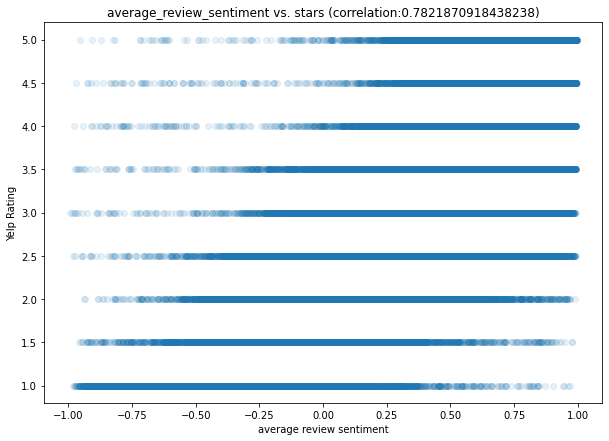

In [33]:
#Plotting average_review_sentiment against stars
plt.figure(figsize = (10,7))
plt.scatter(df['average_review_sentiment'], df['stars'], alpha = 0.1)
plt.title('average_review_sentiment vs. stars (correlation:' + str(corr[0]) + ')')
plt.xlabel('average review sentiment')
plt.ylabel('Yelp Rating')
plt.show()

In [34]:
#Correlation between average_review_sentiment and stars
corr = pearsonr(df['average_review_length'], df['stars'])
print(corr[0])

-0.277081166923254


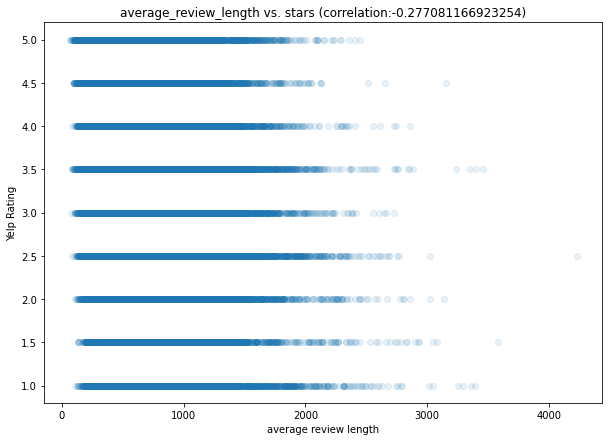

In [35]:
#Plotting average_review_length against stars
plt.figure(figsize = (10,7))
plt.scatter(df['average_review_length'], df['stars'], alpha = 0.1)
plt.title('average_review_length vs. stars (correlation:' + str(corr[0]) + ')')
plt.xlabel('average review length')
plt.ylabel('Yelp Rating')
plt.show()

In [36]:
#Correlation between average_review_sentiment and stars
corr = pearsonr(df['average_review_age'], df['stars'])
print(corr[0])

-0.12564548217662158


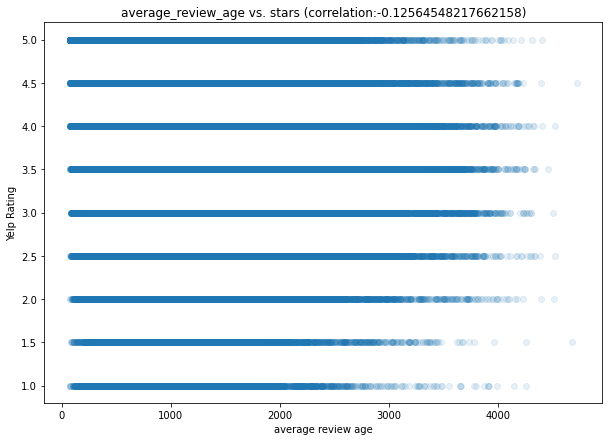

In [37]:
#Plotting average_review_length against stars
plt.figure(figsize = (10,7))
plt.scatter(df['average_review_age'], df['stars'], alpha = 0.1)
plt.title('average_review_age vs. stars (correlation:' + str(corr[0]) + ')')
plt.xlabel('average review age')
plt.ylabel('Yelp Rating')
plt.show()

In [38]:
#Correlation between average_review_sentiment and stars
corr = pearsonr(df['number_funny_votes'], df['stars'])
print(corr[0])

0.0013201028888185124


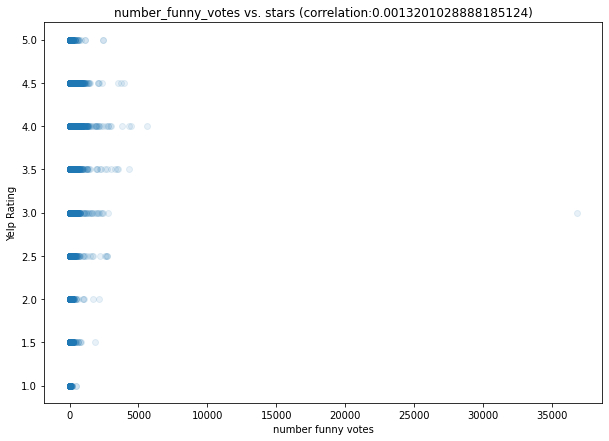

In [39]:
#Plotting number_funny_votes against stars
#Plotting average_review_length against stars
plt.figure(figsize = (10,7))
plt.scatter(df['number_funny_votes'], df['stars'], alpha = 0.1)
plt.title('number_funny_votes vs. stars (correlation:' + str(corr[0]) + ')')
plt.xlabel('number funny votes')
plt.ylabel('Yelp Rating')
plt.show()

### Data Selection & Model Building
In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_lengt`h, and `average_review_age`. Since we want to dig a little deeper than `average_review_sentiment`, which understandably has a very high correlation with Yelp rating, let's choose to create our first model with `average_review_length` and `average_review_age` as features.

In [40]:
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

In [41]:
#Splitting the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

In [42]:
#Fitting the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Evaluating and understanding the model.

The model can be evaluated using the `.score()` method, which provides the R^2 value for our model. R^2 is the coefficient of determination, or a measure of the variance in the dependent variable, that is the Yelp rating, is explained by the independent variables, the features of the data.R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit the data at all, and `1` indicating the model perfectly fits the data.

In [43]:
model.score(X_train, y_train)

0.08250309566544889

In [44]:
model.score(X_test, y_test)

0.08083081210060561

In [45]:
#Printint the coefficients of the features
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074556),
 ('average_review_age', -0.00011621626836366475)]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings. 

In [46]:
y_predicted = model.predict(X_test)

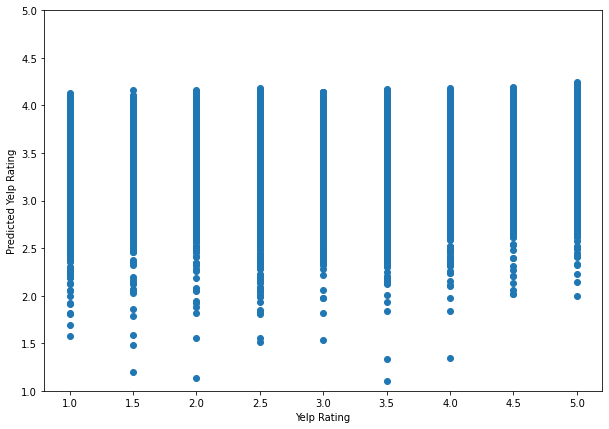

In [47]:
plt.figure(figsize = (10,7))
plt.scatter(y_test,y_predicted)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)
plt.show()

#### Define different Subsets of Data

After evaluating the first model, you can see that average_review_length and average_review_age alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model.

In [48]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

# all features
all_features = binary_features + numeric_features

In [49]:
import numpy as np

# take a list of features to model as a parameter
def model(feature_list):
    
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model to the training data
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print the train and test scores
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot the actual Yelp Ratings vs the predicted Yelp ratings for the test data
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.303390843374967)]


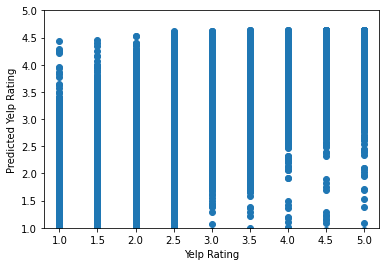

In [50]:
#creating model on only sentiment

model(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.1900300820804082), ('alcohol?', -0.14549670708138862), ('has_wifi', -0.13187397577762405), ('good_for_kids', -0.08632485990337223), ('takes_credit_cards', 0.07175536492195503), ('take_reservations', 0.04526558530451638)]


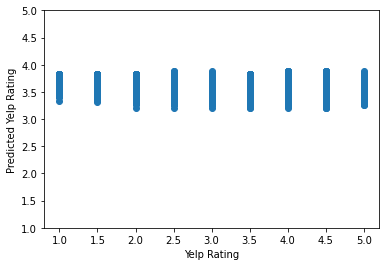

In [51]:
#creating model on only sentiment
model(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120134
[('average_review_sentiment', 2.272107664209677), ('price_range', -0.08046080962701445), ('average_number_years_elite', -0.07190366288054284), ('average_caption_length', -0.0033470660077835218), ('number_pics', -0.00295650281289204), ('number_tips', -0.0015953050789030726), ('number_cool_votes', 0.0011468839227092916), ('average_number_fans', 0.0010510602097447742), ('average_review_length', -0.0005813655692094734), ('average_tip_length', -0.0005322032063457423), ('number_useful_votes', -0.00023203784758712564), ('average_review_count', -0.0002243170289508221), ('average_review_age', -0.00016930608165089726), ('average_days_on_yelp', 0.00012878025876724556), ('weekday_checkins', 5.91858075446039e-05), ('weekend_checkins', -5.518176206974201e-05), ('average_number_friends', 4.826992111583864e-05), ('review_count', -3.483483763867104e-05), ('number_funny_votes', -7.884395674567053e-06)]


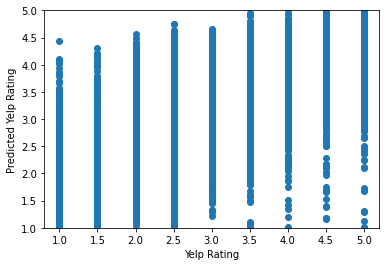

In [52]:
#creating a model with numeric features
model(numeric_features)

Train Score: 0.6807828861895335
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.2808456996623683), ('alcohol?', -0.1499149859346954), ('has_wifi', -0.12155382629262958), ('good_for_kids', -0.11807814422012454), ('price_range', -0.06486730150041427), ('average_number_years_elite', -0.06278939713895423), ('has_bike_parking', 0.027296969912258707), ('takes_credit_cards', 0.024451837853625796), ('take_reservations', 0.014134559172965556), ('number_pics', -0.0013133612300810522), ('average_number_fans', 0.001026798682265563), ('number_cool_votes', 0.0009723722734413303), ('number_tips', -0.0008546563320881045), ('average_caption_length', -0.0006472749798193465), ('average_review_length', -0.0005896257920272468), ('average_tip_length', -0.0004205217503405806), ('number_useful_votes', -0.0002715064125617315), ('average_review_count', -0.00023398356902508714), ('average_review_age', -0.00015776544111326633), ('average_days_on_yelp', 0.00012326147662885568), ('review_count', 0.00

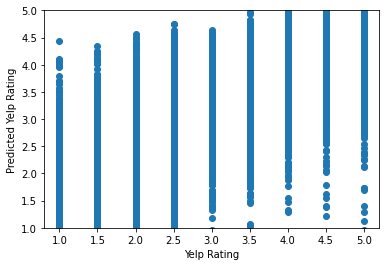

In [53]:
#creating a model with all features
model(all_features)

#### Own Restauarant
Should we open our own restaurant want would the rating be on Yelp? It is observed that a regression model with all the features used produced the best results. So this is the model that will be used here.

In [54]:
features = df.loc[:, all_features]
ratings = df.loc[:, 'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
#Example features for the restauarant
new_restaurant = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [56]:
#Predicted rating
model.predict(new_restaurant)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.03799004])

Using arbitrary values for features of the new restaurant, we got a rating of 4!